In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
np.random.seed(0)

dates = pd.date_range(start="2020-01-01", end="2022-12-31")

data = {
    "Date": dates,
    "Confirmed": np.cumsum(np.random.randint(100, 1000, len(dates))),
    "Recovered": np.cumsum(np.random.randint(80, 900, len(dates))),
    "Deaths": np.cumsum(np.random.randint(5, 50, len(dates)))
}

df = pd.DataFrame(data)

os.makedirs("../../data/healthcare", exist_ok=True)
df.to_csv("../../data/healthcare/covid_data.csv", index=False)

df.head()


,Date,Confirmed,Recovered,Deaths
0,2020-01-01,784,305,33
1,2020-01-02,1443,991,51
2,2020-01-03,2172,1309,65
3,2020-01-04,2464,2066,91
4,2020-01-05,3399,2528,98


In [3]:
df = pd.read_csv("../../data/healthcare/covid_data.csv", parse_dates=["Date"])

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1096 non-null   datetime64[ns]
 1   Confirmed  1096 non-null   int64         
 2   Recovered  1096 non-null   int64         
 3   Deaths     1096 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 34.4 KB


,Date,Confirmed,Recovered,Deaths
count,1096,1096.000000,1096.000000,1096.000000
mean,2021-07-01 12:00:00,306032.093978,268315.683394,14933.272810
min,2020-01-01 00:00:00,784.000000,305.000000,33.000000
25%,2020-09-30 18:00:00,152706.250000,137145.750000,7551.750000
50%,2021-07-01 12:00:00,307654.000000,273576.500000,14822.000000
75%,2022-04-01 06:00:00,462304.000000,402844.500000,22489.500000
max,2022-12-31 00:00:00,610728.000000,529176.000000,29929.000000
std,NaN,176404.388340,152269.862954,8642.509012


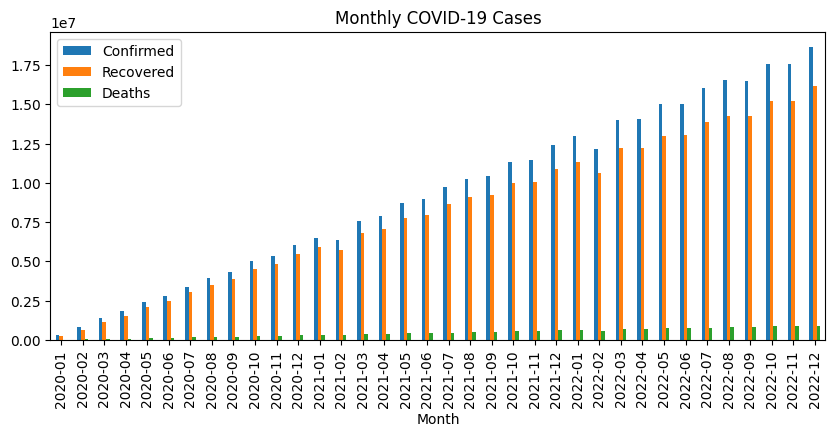

In [4]:
df["Month"] = df["Date"].dt.to_period("M")

monthly_cases = df.groupby("Month")[["Confirmed", "Recovered", "Deaths"]].sum()

monthly_cases.plot(kind="bar", figsize=(10,4))
plt.title("Monthly COVID-19 Cases")
plt.show()


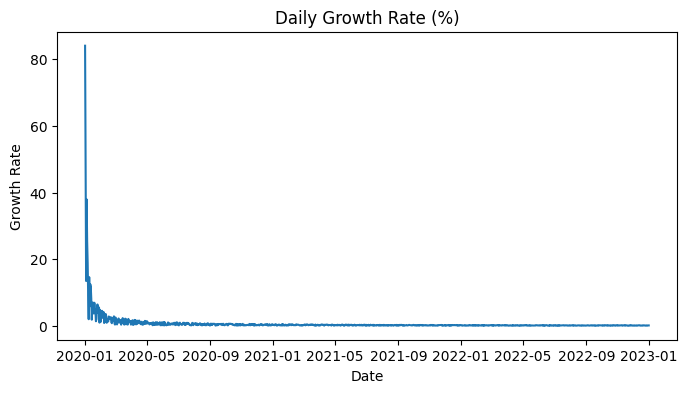

In [5]:
df["Daily_Growth_Rate"] = df["Confirmed"].pct_change() * 100

plt.figure(figsize=(8,4))
plt.plot(df["Date"], df["Daily_Growth_Rate"])
plt.title("Daily Growth Rate (%)")
plt.xlabel("Date")
plt.ylabel("Growth Rate")
plt.show()


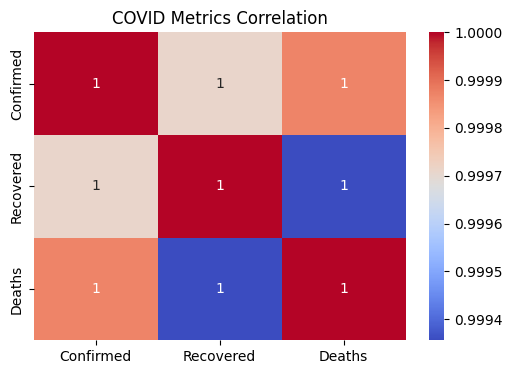

In [6]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["Confirmed", "Recovered", "Deaths"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("COVID Metrics Correlation")
plt.show()


In [7]:
peak_days = df[df["Daily_Growth_Rate"] > 10]
len(peak_days)


9

In [8]:
os.makedirs("../../visualizations/project4_healthcare_analysis", exist_ok=True)
print("Healthcare visualization directory ready")


Healthcare visualization directory ready


## 📌 Key Insights

1. COVID-19 confirmed cases increased exponentially during initial phases.
2. Recovery trends followed confirmed cases with a time lag.
3. Death rate remained significantly lower compared to recovery.
4. Growth rates peaked during outbreak waves.

## 🎯 Recommendations

- Early intervention is critical during high growth periods.
- Healthcare infrastructure should scale during predicted waves.
- Data-driven forecasting can improve emergency preparedness.
